In [ ]:
!pip install openpyxl
!pip install pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached pandas-1.3.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.5 MB)
  Using cached numpy-1.21.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (15.9 MB)
  Using cached seaborn-0.9.0-py3-none-any.whl (208 kB)
  Using cached matplotlib-3.5.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.9 MB)
  Using cached scikit-learn-0.20.1.tar.gz (9.7 MB)
  Preparing metadata (setup.py) ... done
  Using cached setuptools_scm-7.1.0-py3-none-any.whl (43 kB)
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for scikit-learn
  Running setup.p

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import numpy as np
from scipy import stats 
import math

In [ ]:
# from scipy.stats import binom
# prob = 1 - binom.cdf(56, 100, 0.5)
# # print(str(round(prob*100, 1))+"%")
# print(prob)
# from scipy.stats import binom
# print(binom.ppf(1,100,0.5)+1)

1.608000764785622e-05
101.0


In [ ]:
data = pd.read_csv('County_Health_Rankings.csv')
data.head()
data.columns = data.columns.str.replace(' ', '_')  
df = data.dropna(subset=['State', 'County','Year_span'])
df.isnull().sum()
df['Numerator'].fillna((df['Numerator'].mean()), inplace=True)
df['Denominator'].fillna((df['Denominator'].mean()), inplace=True)
df['Raw_value'].fillna((df['Raw_value'].mean()), inplace=True)
df['Confidence_Interval_Lower_Bound'].fillna((df['Confidence_Interval_Lower_Bound'].mean()), inplace=True)
df['Confidence_Interval_Upper_Bound'].fillna((df['Confidence_Interval_Upper_Bound'].mean()), inplace=True)
df['fipscode'].fillna((df['fipscode'].mean()), inplace=True)
df.isnull().sum()

FileNotFoundError: ignored

In [ ]:
# ['State', 'County', 'State code', 'County code', 'Year span',
#        'Measure name', 'Measure id', 'Numerator', 'Denominator', 'Raw value',
#        'Confidence Interval Lower Bound', 'Confidence Interval Upper Bound',
#        'Data Release Year', 'fipscode']

In [ ]:
df1 = pd.get_dummies(data=data, columns = ['State', 'County'])
df1.head()
len(df1.Confidence_Interval_Lower_Bound.unique())

61982

In [ ]:
print(df.shape)
print(df1.shape)
data["Year_span"].value_counts()

(303384, 14)
(303864, 2073)


<ipython-input-52-08536963d9b0>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')


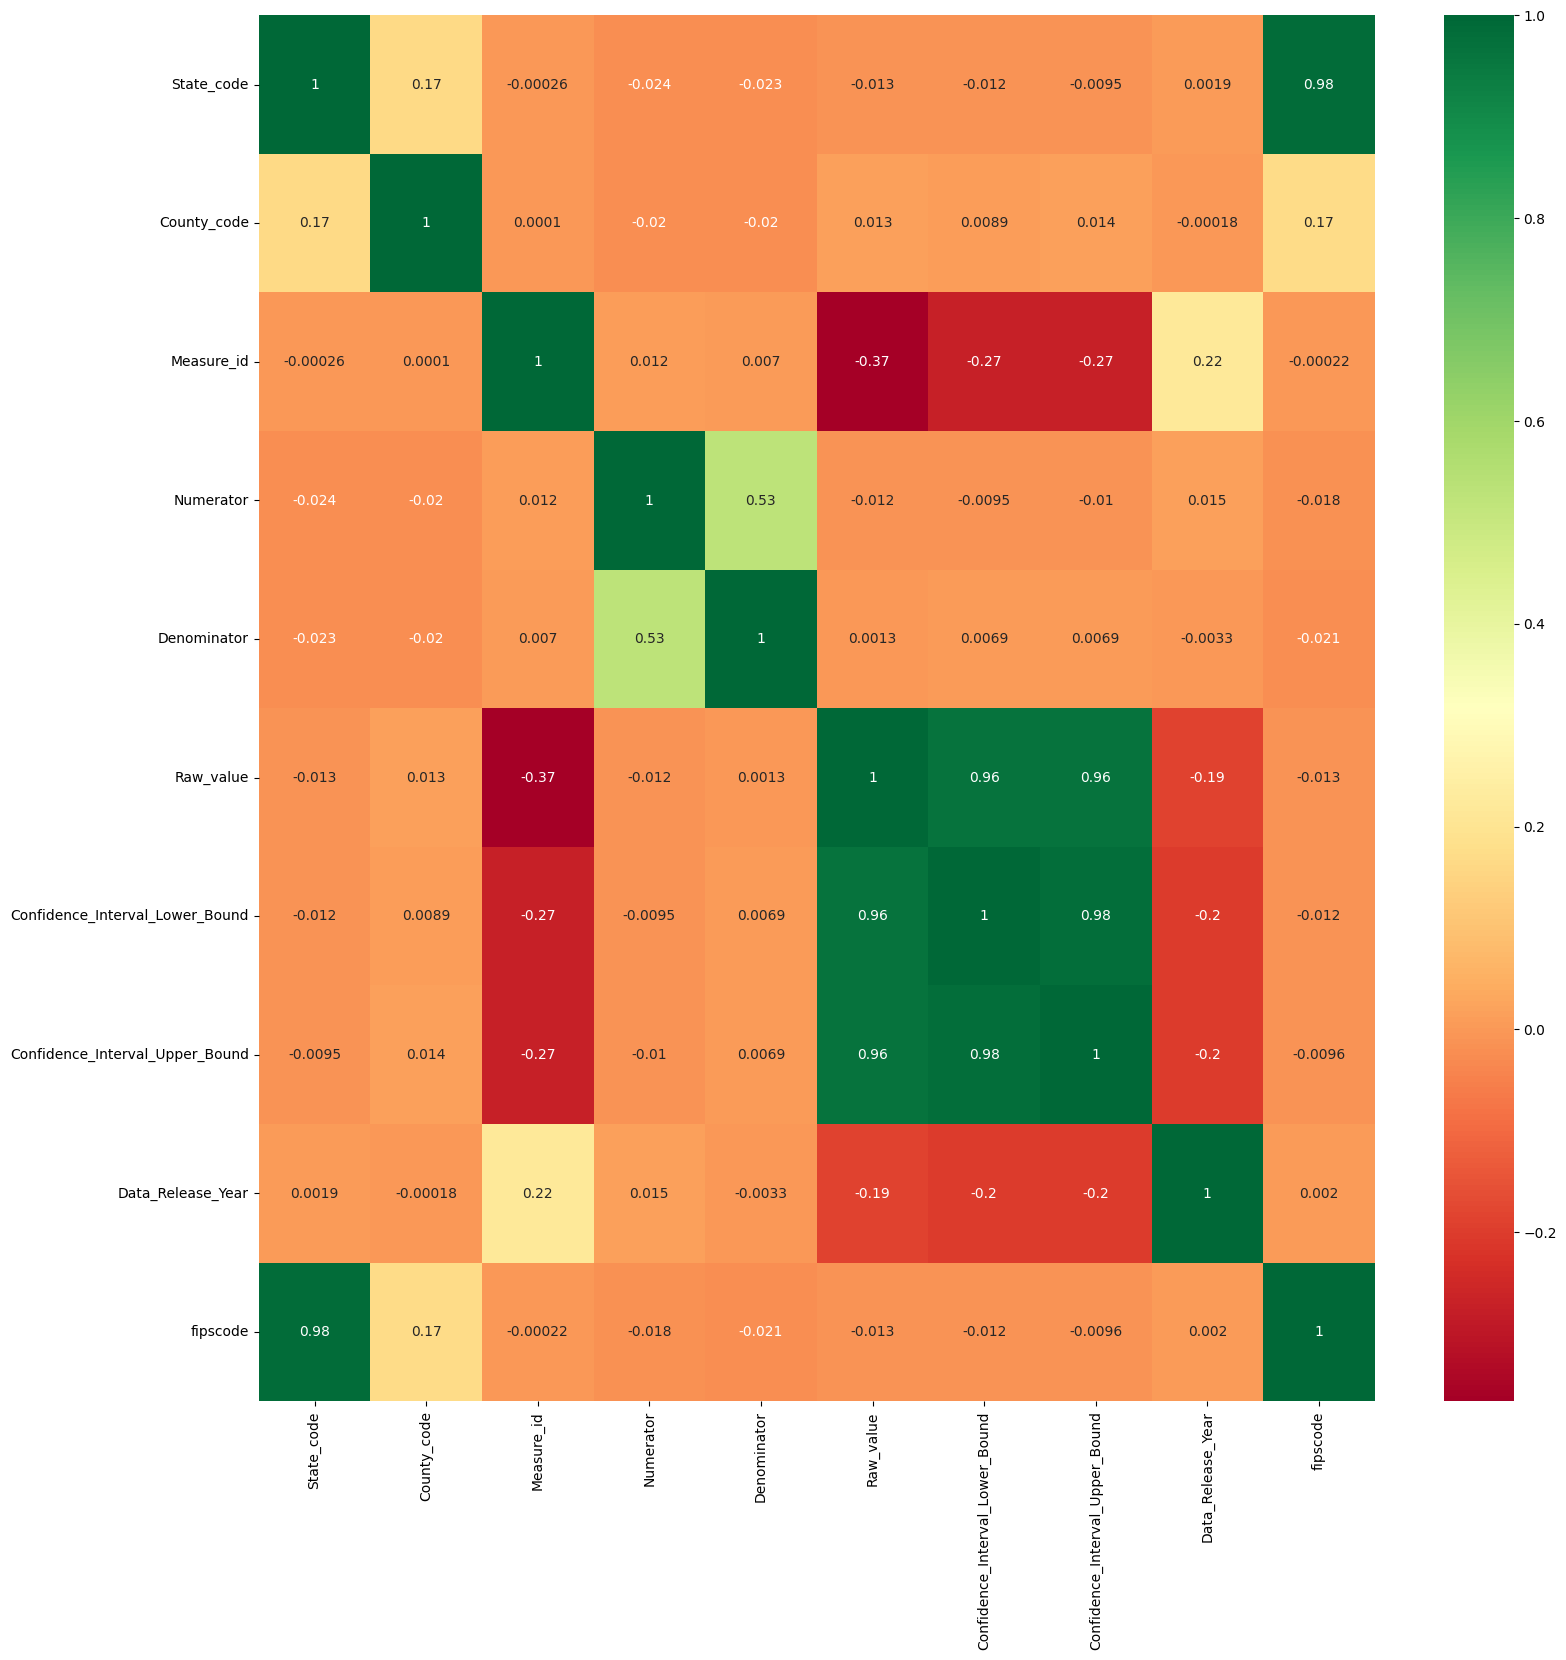

In [ ]:
df.columns
plt.figure(figsize=(18,18))
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')
plt.show()

<ipython-input-56-5ee78bcdaa38>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  features = df.corr()['Numerator'].sort_values()


<Axes: >

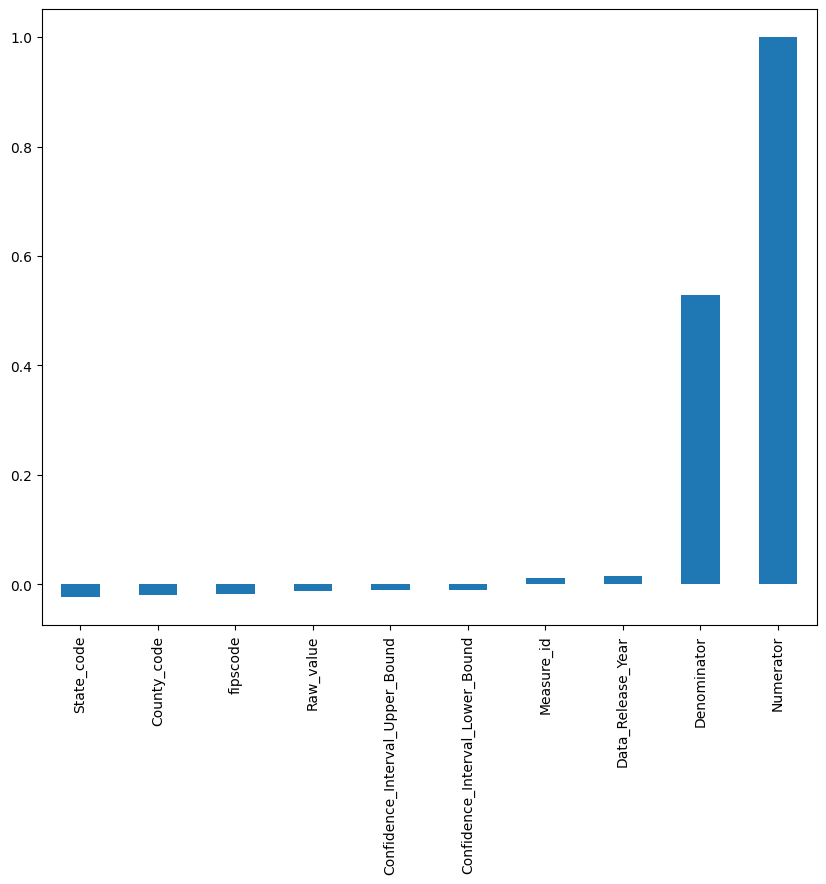

In [ ]:
features = df.corr()['Numerator'].sort_values()
features.plot(kind='bar',figsize=(10,8))

In [ ]:
x= df.loc[:,['Denominator', 'Raw_value', 'Confidence_Interval_Lower_Bound', 'Confidence_Interval_Upper_Bound', 'fipscode']]
y= df.Numerator
scaler = StandardScaler()
x=scaler.fit_transform(x.astype(np.float64))
pca = PCA(n_components = 2)
pca.fit_transform(x)
explained_variance=pca.explained_variance_ratio_

array([[ 0.34374222, 69.4812857 ],
       [ 0.34809274, 70.15881943],
       [ 0.3527216 , 70.8510262 ],
       ...,
       [-0.23706278, -1.20882137],
       [-0.23719885, -1.2088196 ],
       [-0.23748751, -1.20881584]])

In [ ]:
pca = PCA()
pca.fit(x)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >=0.95) + 1
pca = PCA(n_components=0.95)
x_reduced = pca.fit_transform(x)
px.area(
    x=range(1, cumsum.shape[0] + 1),
    y=cumsum,
    labels={"x": "# Components", "y": "Explained Variance"}
)

In [ ]:
# 'Numerator', 'Denominator', 'Raw value',
#        'Confidence Interval Lower Bound', 'Confidence Interval Upper Bound',

In [ ]:
import seaborn as sns 
import matplotlib.pylab as plt
%matplotlib inline
sns.distplot(data['Numerator'])

NameError: ignored